In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [3]:
def dsigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

In [4]:
dsigmoid(0)

0.25

In [5]:
x = np.arange(-5, 5, 0.01)

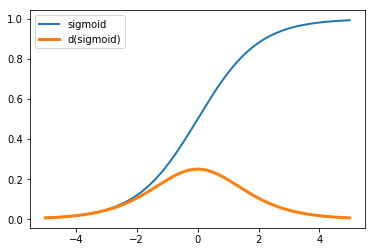

In [6]:
sig = sigmoid(x)
plt.plot(x, sig, linewidth=2)
plt.plot(x, dsigmoid(x), linewidth=3)
plt.legend(['sigmoid', 'd(sigmoid)'])
plt.show()

In [53]:
iris = load_iris()
print(iris.feature_names)
print("['sentosa' 'non-sentosa']")
iris_X, iris_Y = iris.data[:-1,:], iris.target[:-1]
numFeatures = iris_X.shape[1]
numLabels = 1
X = iris_X
Y = []
for ele in iris_Y:
    if ele == 0:
        Y.append(1.0)
    else:
        Y.append(0.0)
Y = np.asarray(Y)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['sentosa' 'non-sentosa']


In [85]:
w = np.random.normal(loc=0.0, scale=0.01, size=(numFeatures, numLabels))
b = np.random.normal(loc=0.0, scale=0.01, size=(1, numLabels))
epochs = 1000
learning_rate = 1e-2
losses = []
for i in range(epochs):
    l = 0
    dw = [0 for z in range(numFeatures)]
    db = 0
    for j in range(149):
        
        z = np.add(np.matmul(X[j].reshape((1,4)), w), b)
        a = sigmoid(z)
        l += -(Y[j]*np.log(a) + (1-Y[j])*np.log(1-a))
        dz = a - Y[j]
        for k in range(numFeatures):
            dw[k] += X[j][k]*dz[0][0]
            
            db += dz[0][0]
    
    dw = np.asarray(dw)/149
    db = np.asarray(db)/149
    ls = l/149
    dw = dw.reshape((4,1))
    w = w - learning_rate*dw
    b = b - learning_rate*db
    losses.append(ls[0][0])
#     print('Loss : {}'.format(l))

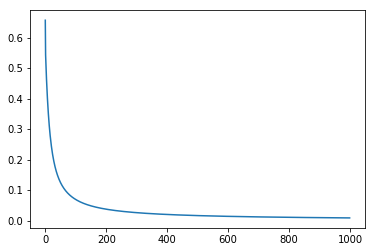

In [86]:
plt.plot(losses)
plt.show()

In [100]:
Y_pred = []
count = 0
for i in range(149):
    z = np.add(np.matmul(X[i].reshape((1,4)), w), b)
    a = sigmoid(z)
    
    if a[0][0] >= 0.5 and Y[i] == 1:
        count += 1
        Y_pred.append(1.0)
    if a[0][0] < 0.5 and Y[i] == 0:
        count += 1
        Y_pred.append(0.0)
print('Accuracy : ', count/149*100, '%')

Accuracy :  100.0 %
